#計算機程式設計二
#第三週上課內容

## 主題：演算法 (Algorithms)、資料結構 (Data Structures)、Josephus Problem

###GitHub 教材參考資料

[i2p-nthu 程式設計二 Josephus Problem](https://github.com/htchen/i2p-nthu/blob/master/%E7%A8%8B%E5%BC%8F%E8%A8%AD%E8%A8%88%E4%BA%8C/mid1/3-josephus_problem.md)





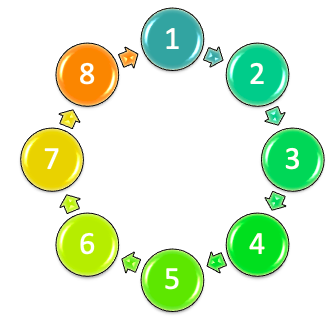

##Problem Definition

有 `n` 個人排成一圈，從 第一個位置開始數，往前每數到第 `m` 個人，就將那個人從圈子中移除。將被移除的順位列出，就構成所謂的 Josephus Permutation。以 `n=8`, `m=4` 為例，假設從編號 `1` 的人開始數，則最早被移除的會是編號 `4` 那個人。請看底下的過程，編號加底線表示從那個人開始數，粗體的編號代表要被移除的人 :

* 第 *1* 次 : 1_ 2 3 **4** 5 6 7 8 -> 1 2 3 5_ 6 7 8
* 第 *2* 次 : 1 2 3 5_ 6 7 **8** -> 1_ 2 3 5 6 7
* 第 *3* 次 : 1_ 2 3 **5** 6 7 -> 1 2 3 6_ 7
* 第 *4* 次 : 1 **2** 3 6_ 7 -> 1 3_ 6 7
* 第 *5* 次 : **1** 3_ 6 7 -> 3_ 6 7
* 第 *6* 次 : **3**_ 6 7 -> 6_ 7
* 第 *7* 次 : 6_ **7** -> 6_
* 第 *8* 次 : **6**_ -> NULL

所以編號 `1` 到 `8` 的人被移除的順位是 `{ 5, 4, 6, 1, 3, 8, 7, 2 }`，這就是 `n=8`, `m=4` 的 Josephus Permutation，我們可以寫成 `JP(8, 4) = { 5, 4, 6, 1, 3, 8, 7, 2 }`，它的意思是編號 `1` 的人會是第 *5* 順位被移除，編號 `2` 的人會在第 *4* 順位被移除，而編號 6 的人會是第 *8* 順位，也就是最後一個存留下的人。

另外我們也可以列出 Inverse Josephus Permutation，以上面 `n=8`, `m=4` 的例子會是 `IJP(8, 4) = { 4 8 5 2 1 3 7 6 }` 也就是依照被移除的順序將編號列出。

接下來我們寫程式，輸入 `n` 和 `m` ，讓程式自動列出 Inverse Josephus Permutation。開始寫程式之前，我們要先想好，(1) 如何用程式碼表達問題所描述的資料形式，以及 (2) 如何用程式碼處理資料。這兩個問題牽涉到「資料結構」 (Data Structures) 和「演算法」(Algorithms) 的設計。我們會寫出幾種不同的版本，比較它們運算的時間與空間複雜度。


這個問題的詳細描述與數學解 : https://en.wikipedia.org/wiki/Josephus_problem

## Method 1
演算法採用模擬的方式，資料結構則採用 Array。

做法是先產生一個陣列，陣列的元素是每個人的編號。接下來就逐步模擬移除的過程，移除了某個人之後，就將後面的陣列元素往前挪。

In [ ]:
%%writefile inclass_1.c
#include <stdio.h>
#include <stdlib.h>

int main(void)
{
  int n, m, i, count=0, pos=0;
  int *a;
  scanf("%d%d", &n, &m);
  a = (int*) malloc(sizeof(int)*n);
  for (i=0; i<n; ++i) a[i] = i+1;
  while (n>1) {
    pos += (m-1);
    pos %= n;
    printf("%d->", a[pos]);
    a[pos] = -1;
    // 0 1 2 3 4 5  6
    // 1 2 3 5 6 7 -1
    for (i=pos+1; i<n; i++) {
      a[i-1] = a[i];
    }
    --n;
    pos %= n;
  }

  printf("%d.\n", a[0]);

  return 0;
}

Writing inclass_1.c


In [ ]:
%%shell
gcc -o inclass_1 inclass_1.c
./inclass_1

41 3
3->6->9->12->15->18->21->24->27->30->33->36->39->1->5->10->14->19->23->28->32->37->41->7->13->20->26->34->40->8->17->29->38->11->25->2->22->4->35->16->31.


In [ ]:
%%writefile inclass_1.c
#include <stdio.h>
#define N 41
#define M 3
int a[N];

void shift_left(int i, int n)
{
    int j;
    for (j=i+1; j<n; j++) {
        a[j-1] = a[j];
    }
}

void show(int n)
{
    int i;
    for (i=0; i<N; ++i) {
        printf("%d, ", a[i]);
    }
    printf("\n");
}

int main(void)
{
    int i, n;
    for (i=0; i<N; ++i) {
        a[i] = i+1;
    }
    n = N;
    i = 0;
    while (n > 1) {
        i = i + M-1;
        i = i % n;
        printf("%d, ", a[i]);
        shift_left(i, n);
        --n;
    }
    printf(" *%d*\n", a[0]);

}

Overwriting inclass_1.c


In [ ]:
%%shell
gcc -o inclass_1 inclass_1.c
./inclass_1

3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 1, 5, 10, 14, 19, 23, 28, 32, 37, 41, 7, 13, 20, 26, 34, 40, 8, 17, 29, 38, 11, 25, 2, 22, 4, 35, 16,  *31*


In [ ]:
%%writefile E04_01.c

// Method 1 for Inverse Josephus Permutation
#include <stdio.h>
#define N 41
#define M 3
int a[N];

int main(void)
{
    int i;
    int SS, CP;

    for (i=0; i<N; i++) a[i] = i+1;

    CP = 0;
    SS = N;

    while (SS>0) {
        CP += M-1;
       if (CP>=SS) CP = CP%SS;
        printf("%d ", a[CP]);
        for (i=CP; i<SS-1; i++) a[i] = a[i+1];
        --SS;
    }
    printf("%d ", a[CP]);
    return 0;
}


Overwriting E04_01.c


In [ ]:
%%shell
gcc -o E04_01 E04_01.c
./E04_01

3 6 9 12 15 18 21 24 27 30 33 36 39 1 5 10 14 19 23 28 32 37 41 7 13 20 26 34 40 8 17 29 38 11 25 2 22 4 35 16 31 31 

## Method 2
和 Method 1 一樣，演算法也是採用模擬的方式，資料結構採用 Array。

和 Method 1 不同的地方在於，移除了某個人之後，只將原本的陣列元素標記為 -1，不移動其他陣列元素。

In [ ]:
%%writefile inclass_2.c
#include <stdio.h>
#include <stdlib.h>

int main(void)
{
  int n, m, i, count=0, pos=-1;
  int *a;
  scanf("%d%d", &n, &m);
  a = (int*) malloc(sizeof(int)*n);
  for (i=0; i<n; ++i) a[i] = i+1;
  while (count<n) {
    i = 0;
    while (i < m%n) {
      pos++;
      pos %= n;
      if (a[pos] != -1) {
        i++;
      }
    }
    printf("%d->", a[pos]);
    a[pos] = -1;
    count++;
  }

  printf("\n");

  return 0;
}

Overwriting inclass_2.c


In [ ]:
%%shell
gcc -o inclass_2 inclass_2.c
./inclass_2

8 65540
4->2->5->3->1->7->6->8->


In [ ]:
%%writefile inclass_2.c
#include <stdio.h>
#define N 41
#define M 3
int a[N];

int find_next(int i)
{
    do {
        i = (i+1)%N;
    } while (a[i] == -1);
    return i;
}

int main(void)
{
    int i, n, k;
    for (i=0; i<N; ++i) {
        a[i] = i+1;
    }
    n = N;
    i = -1;
    while (n > 1) {
        k = 0;
        while (k < M) {
          i = find_next(i);
          k++;
        }
        printf("%d, ", a[i]);
        a[i] = -1;
        --n;
    }
    i = find_next(i);
    printf(" *%d*\n", a[i]);

}

Overwriting inclass_2.c


In [ ]:
%%shell
gcc -o inclass_2 inclass_2.c
./inclass_2

13, 33, 20, 15, 19, 32, 12, 5, 8, 25, 9, 7, 24, 10, 16, 36, 35, 14, 17, 39, 4, 3, 38, 27, 6, 37, 34, 18, 21, 11, 26, 23, 30, 1, 40, 31, 29, 28, 22, 2,  *41*


In [ ]:
%%writefile E04_02.c
// Method 2 for Inverse Josephus Permutation
#include <stdio.h>
#define N 41
#define M 3
int a[N];
int main(void)
{
    int i;
    int SS, CP;
    for (i=0; i<N; i++) a[i] = i+1;

    SS = N;
    CP = -1;

    while (SS>1) {
        i = 0;
        do {
            CP = (CP + 1)%N;
            if (a[CP] != -1) i++;
        } while (i<M);
        printf("%d ", a[CP]);
        a[CP] = -1;
        --SS;
    }
      i=0;
            do {
            CP = (CP + 1)%N;
            if (a[CP] != -1) i++;
        } while (i<M);
    printf("%d ", a[CP]);
    return 0;
}


Overwriting E04_02.c


In [ ]:
%%shell
gcc -o E04_02 E04_02.c
./E04_02

3 6 9 12 15 18 21 24 27 30 33 36 39 1 5 10 14 19 23 28 32 37 41 7 13 20 26 34 40 8 17 29 38 11 25 2 22 4 35 16 31 

## Method 3
演算法也是採用模擬的方式，資料結構採用 Circular Linked List。

這個方法的時間複雜度比較容易分析，因為每次都剛好數 `m` 次就可以去掉一個人。總共有 `n` 個人，所以時間複雜度是 `O(mn)`。

In [ ]:
%%writefile inclass_3.c
#include <stdio.h>
#include <stdlib.h>

typedef struct _Node {
  int id;
  struct _Node *next;
} Node;

typedef struct {
  Node *first;
  Node *last;
} Head;

Node* create_node(int id)
{
  Node *p;
  p = (Node *) malloc(sizeof(Node));
  p->id = id;
  p->next = p;
  return p;
}

Head insert_node(Head h, Node *p)
{
  if (h.first == NULL) {
    h.first = h.last = p;
  } else {
    p->next = h.first;
    h.first = p;
    (h.last)->next = h.first;
  }
  return h;
}

Head delete_node(Head h, Node *prev)
{
  Node *p;
  if (h.first != NULL) {
    if (h.first == h.last && h.first == prev) {
      free(prev);
      h.first = h.last = NULL;
    } else {
      p = prev->next;
      if (p == h.first) {
        h.first = p->next;
        (h.last)->next = h.first;
      } else if (p == h.last) {
        h.last = prev;
        (h.last)->next = h.first;
      } else {
        prev->next = p->next;
      }
      free(p);
    }
  }
  return h;
}

void show(Head h)
{
  Node *p;
  if (h.first!=NULL) {
    p = h.first;
    do {
      printf("%d->", p->id);
      p = p->next;
    } while (p!=h.first);
    printf(".\n");
  }
}

int main(void)
{
  Head head = {NULL, NULL};
  int i, count = 0;
  Node *p;
  int n, m;
  scanf("%d%d", &n, &m);
  for (i=n; i>=1; i--) {
    p = create_node(i);
    head = insert_node(head, p);
  }

  p = head.last;
  while (count<n) {
    i = 0;
    while (i < (m-1)%n) {
      p = p->next;
      i++;
    }
    printf("%d->", (p->next)->id);
    head = delete_node(head, p);
    count++;
  }

  printf("\n");

  return 0;
}

Overwriting inclass_3.c


In [ ]:
%%shell
gcc -o inclass_3 inclass_3.c
./inclass_3

8 4
4->8->5->2->1->3->7->6->


In [ ]:
%%writefile inclass_3.c
#include <stdio.h>
#include <stdlib.h>
#define N 41
#define M 3
typedef struct _node {
  int id;
  struct _node *next;
} Node;

Node * insert(Node* p, int id)
{
    Node *q;
    q = (Node*) malloc(sizeof(Node));
    q->id = id;
    if (p == NULL) {
      q->next = q;
      p = q;
    } else {
      q->next = p->next;
      p->next= q;
    }
    return p;
}

Node * delete(Node* p, Node* pre)
{
  if (p == p->next) {
    printf("*%d*\n", p->id);
    return p;
  } else {
    pre->next = p->next;
    printf("<%d> ", p->id);
    free(p);
    if (pre->next == pre) {
      return pre;
    } else {
      return pre->next;
    }
  }
}

void show(Node *p)
{
    Node *q = p;

    do {
      printf("%d, ", q->id);
      q = q->next;
    } while (q != p);
    printf("\n");
}


int main(void)
{
  Node *head = NULL;
  Node *pre;
  int i, n, k;
  for (i=N; i>0; --i) {
    head = insert(head, i);
  }
  pre = head;
  head = head->next;
  n = N;
  while (n > 1) {
    for (k=0; k<(M-1)%n; ++k) {
      pre = head;
      head = head->next;
    }
    head = delete(head, pre);
    n--;
  }
  head = delete(head, pre);
  return 0;
}

Overwriting inclass_3.c


In [ ]:
%%shell
gcc -o inclass_3 inclass_3.c
./inclass_3

<3> <6> <9> <12> <15> <18> <21> <24> <27> <30> <33> <36> <39> <1> <5> <10> <14> <19> <23> <28> <32> <37> <41> <7> <13> <20> <26> <34> <40> <8> <17> <29> <38> <11> <25> <2> <22> <4> <35> <16> *31*


In [ ]:
%%writefile E04_03.c
// Method 3 for Inverse Josephus Permutation
#include <stdio.h>
#include <stdlib.h>
#define N 41
#define M 3
typedef struct _node {
    int id;
    struct _node *next;
} Node;

void insertNext(Node *p, int id)
{
    Node *q;
    q = (Node*) malloc(sizeof(Node));
    q->id = id;
    q->next = p->next;
    p->next = q;
}
Node* deleteNext(Node *p)
{
    Node *q;
    q = p->next;
    p->next = q->next;
    free(q);
    return p;
}

int main(void)
{
    Node *last;
    int i;
    int SS;

    last = (Node*) malloc (sizeof(Node));
    last->id = N;
    last->next = last;

    for (i=N-1; i>=1; i--) insertNext(last, i);

    SS = N;
    while (last->next != last) {
        for (i=0; i<(M-1)%SS; i++)
            last = last->next;
        printf("%d ", last->next->id);
        last = deleteNext(last);
        --SS;
    }
    printf("%d ", last->next->id);
    return 0;
}


Overwriting E04_03.c


In [ ]:
%%shell
gcc -o E04_03 E04_03.c
./E04_03

3 6 9 12 15 18 21 24 27 30 33 36 39 1 5 10 14 19 23 28 32 37 41 7 13 20 26 34 40 8 17 29 38 11 25 2 22 4 35 16 31 

# Method 4
演算法也是採用模擬的方式，資料結構採用 Array 來模擬 Linked List。

主要的想法是利用 Array 模擬 Circular Linked List，自己維持 `next` 的連接順序。從這個例子也可以看出 Array 與 指標之間相通之處。此外，使用 Array 模仿 Linked List 與真正的 Linked List 還有一個不同的地方：Linked List 可以動態產生和移除Node，如果是用 Array 模仿則會占用固定大小的空間，沒用到的Node其實還在原位，沒有真的被移除掉，只是靠 `next` 跳過而已。
時間複雜度是 O(mn)。

In [ ]:
%%writefile inclass_4.c
#include <stdio.h>
#include <stdlib.h>
typedef struct _Node {
    int id;
    int next;
    int prev;
} Node;

int main(void)
{
    Node *a;
    int n, m, i;
    int count = 0;
    int p, to_be_killed;
    scanf("%d%d", &n, &m);

    a = (Node *) malloc(sizeof(Node) * n);

    for (i=0; i<n; i++) {
        a[i].id = i + 1;
        a[i].next = (i + 1)%n;
        a[i].prev = (i-1)%n;
    }

    p = n-1;

    while (count<n) {
      i = 0;
      while (i < (m-1)%n) {
        p = a[p].next;
        i++;
      }

      to_be_killed = a[p].next;
      printf("%d->", a[to_be_killed].id);
      a[p].next = a[to_be_killed].next;

      count++;
    }

  printf("\n");

    return 0;
}

Overwriting inclass_4.c


In [ ]:
%%shell
gcc -o inclass_4 inclass_4.c
./inclass_4

8 4
4->8->5->2->1->3->7->6->


In [ ]:
%%writefile E04_04.c

// Method 4 for Inverse Josephus Permutation
#include <stdio.h>
#include <stdlib.h>
#define N 41
#define M 3
typedef struct  _node {
    int id;
    int next;
} Node;


int main(void)
{
    Node circle[N];
    int i, CP, SS;
    for (i=0; i<N; i++) {
        circle[i].id = i+1;
        circle[i].next = (i+1)%N;
    }
    // circle[N-1].next = 0

    SS = N;
    CP = N-1;

    while (SS>0) {
        for (i=0; i<(M-1)%SS; i++) {
            CP = circle[CP].next;
        }
        printf("%d ", circle[circle[CP].next].id);
        if (circle[CP].next == circle[circle[CP].next].next)
            break;
        circle[CP].next = circle[circle[CP].next].next;
        --SS;
    }

    return 0;
}


Writing E04_04.c


In [ ]:
%%shell
gcc -o E04_04 E04_04.c
./E04_04

3 6 9 12 15 18 21 24 27 30 33 36 39 1 5 10 14 19 23 28 32 37 41 7 13 20 26 34 40 8 17 29 38 11 25 2 22 4 35 16 31 

## Method 5

最後是遞迴的做法。底下的寫法只能列出最後一個留下來的人，不能列出 Inverse Josephus Permutation。

In [ ]:
%%writefile E04_05.c
// Method 5 recursion

#include <stdio.h>

int f(int n, int m){ // index from 1 to n
    if( n == 1 ) return 1;
    else return ( f(n-1, m) + m-1 ) % n + 1;
}

int main(void) {
    int n = 41, m = 3, i;
    printf("%d\n", f(n,m));
    return 0;
}

Overwriting E04_05.c


In [ ]:
%%writefile E04_05.c
// Method 5 loop

#include <stdio.h>

int f(int n, int m){ // index from 1 to n
    int i, ans=1;
    for (i=1; i<=n; ++i) {
      ans = (ans + m-1) % i + 1;
    }
    return ans;
}

int main(void) {
    int n = 41, m = 3, i;
    printf("%d\n", f(n,m));
    return 0;
}

Overwriting E04_05.c


In [ ]:
%%writefile E04_05.c
// Method 5 for Inverse Josephus Permutation

#include <stdio.h>

int main(void) {
    // n = people, i = the i-th be killed(1~n)
    // m = every m people kill one
    // p = the index(1~n) who be killed
    int n = 8, m = 4, p, i;
    for( i=1; i<=n; i++){
        p = i * m;
        while( p > n ) p = p-n + (p-n-1) / (m-1);
        printf("%d ", p);
    }
    return 0;
}

Overwriting E04_05.c


In [ ]:
%%shell
gcc -o E04_05 E04_05.c
./E04_05

31


上面的函數 `F(n, m)` 傳回的值是最後能夠存留下來的人的編號，也就是如果總共 `n 個人，每 `m` 個移除掉一人，最後能夠剩下的人他的編號會是 `F(n,m)`。同樣地，`F(n-1,m)` 則是總共 `n-1` 個人、每 `m` 個移除掉一人，最後留下的人的編號。

遞迴的關鍵在於找出F `(n,m)` 和 `F(n-1,m)` 之間的關聯。原本有 `n` 個人，移除掉一個之後，剩下 `n-1` 個人。假如我們有辦法知道 `F(n-1,m)` 是多少，那麼我們該如何推算出 `F(n,m)`?

如果我們知道 `F(n-1, m)`，也就是最後留下的那個人，我們就能換算出他在原本的 `n` 個人的相對位置。以 `F(41,3)` 為例，如果我們知道 `F(40,3)` 的值是 `28`，對應到原本 `41` 人的情況中，`F(40,3)` 其實是從原本的編號 `4` 的人開始數，因為原本 `41` 人如果是從編號 `1` 開始數，一開始第一個被移除的人編號應該是 `3` ，所以接下來剩下的 `40` 個人中的第一個人 (新的編號 `1`)，在原本 `41` 人中的編號是 `4`。這樣我們就可以看得出新舊編號的對應關係 ，所以如果 `F(40,3)` 是 `28`，則 `F(41,3)`應該是 `31`。

時間複雜度 `O(n)`。